In [31]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def Jacobi(A, b, iter_n, initial_guess=0):
    n = len(A)
    D = np.diag(A)
    R = A - np.diag(D)
    x_i = initial_guess * np.ones(n)
    for i in range(iter_n):
        x_i = (b - R.dot(x_i)) / D
    return x_i

# 编程 7.2-1（a）

In [33]:
def A_ij(n):
    A = np.zeros((n, n))
    h=1.0/(1+n)

    for i in range(n):
        A[i, i] = -h**2-2
        if i < n-1:
            A[i, i+1] = 1
            A[i+1, i] = 1

    return A
def t(x,n):
    h=1.0/(1+n)
    return 2*np.exp(x*h)/3*h**2
def b_i(n):
    b=np.zeros(n) 
    for i in range(1,n-1):
        b[i]=t(i,n)
    b[0]=-0
    b[n-1]=-np.e/3
    return b

In [34]:
n=[9,19,39]
y=[]
for i in n:
    y0=np.zeros(i)
    y1=Jacobi(A_ij(i),b_i(i),100000,y0)
    print("n=%d\n"%i,y1)
    y.append(y1)

n=9
 [0.04783884 0.09615607 0.15280267 0.21911998 0.29662755 0.38704689
 0.49232818 0.61468021 0.75660406]
n=19
 [0.02029059 0.0406319  0.06282691 0.08702094 0.11336891 0.14203598
 0.17319818 0.20704314 0.24377082 0.2835943  0.32674062 0.37345166
 0.42398508 0.47861533 0.53763469 0.60135439 0.67010581 0.74424173
 0.82413766]
n=39
 [0.00923653 0.01847884 0.0281599  0.0382966  0.04890635 0.06000716
 0.07161761 0.08375693 0.09644494 0.10970215 0.12354973 0.13800953
 0.15310415 0.1688569  0.18529186 0.2024339  0.22030872 0.23894282
 0.25836359 0.2785993  0.29967914 0.32163325 0.34449273 0.36828972
 0.39305735 0.41882986 0.44564258 0.47353197 0.50253566 0.53269249
 0.56404257 0.59662726 0.63048925 0.6656726  0.70222279 0.74018671
 0.77961279 0.82055095 0.86305274]


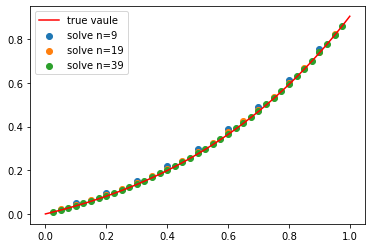

In [35]:
x_range=np.linspace(0,1,100)
def f(x):
    return x*np.exp(x)/3
plt.plot(x_range,f(x_range),'-r',label='true vaule')
plt.scatter(np.linspace(0,1,n[0]+2)[1:-1],y[0],label='solve n=9')
plt.scatter(np.linspace(0,1,n[1]+2)[1:-1],y[1],label='solve n=19')
plt.scatter(np.linspace(0,1,n[2]+2)[1:-1],y[2],label='solve n=39')
plt.legend()
plt.show()

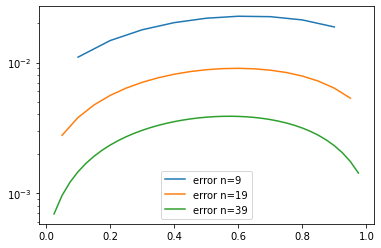

In [36]:
for i in range(3):
    err=np.abs(f(np.linspace(0,1,n[i]+2)[1:-1])-y[i][:n[i]])
    plt.plot(np.linspace(0,1,n[i]+2)[1:-1],err)
plt.legend(['error n=9','error n=19','error n=39'])
plt.yscale('log')

# 编程 7.2-3（a）

In [37]:
def Newton_Method(F, DF, x, iter_num=10**4):
    for i in range(iter_num):
        s = np.linalg.inv(DF(x)).dot(F(x))
        x -= s
    return x

In [38]:
import numpy as np
def F(w):
    wt=w.copy()
    n=wt.size
    h=1/(1+n)
    ft=np.zeros(n)
    
    ft[0]=1/3-2*wt[0]-18*h**2*w[0]**2+w[1]
    ft[n-1]=w[n-2]-2*wt[n-1]-18*h**2*w[n-1]**2+1/12
    
    for i in range(1,n-1):
        ft[i]=w[i-1]-2*wt[i]-18*h**2*w[i]**2+w[i+1]
    
    return np.array(ft) 

def DF(w):
    n=w.size
    A = np.zeros((n, n))
    h=1.0/(1+n)

    for i in range(n):
        A[i, i] = -36*h**2*w[i]-2
        if i < n-1:
            A[i, i+1] = 1
            A[i+1, i] = 1

    return A   

In [39]:
n2=[9,19,39]
y2=[]
for i in n2:
    y0_2=np.zeros(i)
    y1_2=Newton_Method(F,DF,y0_2,10000)
    print("n=%d\n"%i,y1_2)
    y2.append(y1_2)

n=9
 [0.2757491  0.23185162 0.19763008 0.17043891 0.14847664 0.13048252
 0.11555303 0.10302699 0.09241157]
n=19
 [0.30238432 0.27554994 0.25213231 0.23157536 0.21343163 0.19733779
 0.18299635 0.17016185 0.15863033 0.14823117 0.13882078 0.13027758
 0.12249814 0.11539396 0.10888899 0.10291758 0.09742281 0.09235514
 0.08767129]
n=39
 [0.31727717 0.3023535  0.28845826 0.27549913 0.26339386 0.25206908
 0.24145911 0.23150504 0.22215391 0.21335799 0.2050742  0.19726352
 0.18989062 0.18292337 0.17633257 0.17009155 0.16417602 0.15856371
 0.15323426 0.14816896 0.14335065 0.13876352 0.13439301 0.13022569
 0.12624916 0.12245194 0.11882341 0.11535371 0.11203372 0.10885493
 0.10580944 0.10288991 0.10008947 0.09740174 0.09482073 0.09234087
 0.08995694 0.08766405 0.08545761]


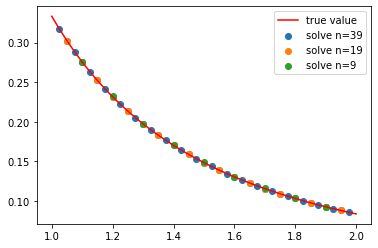

In [51]:
x_range=np.linspace(1,2,100)
def f_2(x):
    return 1/(3*x**2)
plt.plot(x_range,f_2(x_range),'r-',label='true value')
plt.scatter(np.linspace(1,2,n2[2]+2)[1:-1],y2[2],label='solve n=39')
plt.scatter(np.linspace(1,2,n2[1]+2)[1:-1],y2[1],label='solve n=19')
plt.scatter(np.linspace(1,2,n2[0]+2)[1:-1],y2[0],label='solve n=9')
plt.legend()
plt.show()

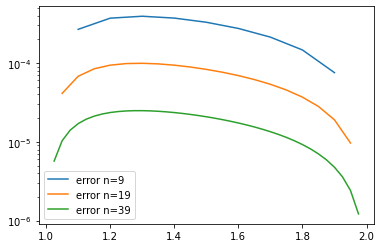

In [57]:
for i in range(3):
    err=np.abs(f_2(np.linspace(1,2,n2[i]+2)[1:-1])-y2[i][:n[i]])
    plt.plot(np.linspace(1,2,n2[i]+2)[1:-1],err)
plt.legend(['error n=9','error n=19','error n=39'])
plt.yscale('log')